# Sales dataset


# Objetivo
Centralizar los conceptos vistos en el capitulo 2 del curso "manipulaicon de datos con pandas"

En este notebook los conceptos que se presentan son
- media y mediana
- metodo agg
- eliminar duplicados: drop_duplicates
- contar variables categoricas: value_counts
- agrupar: groupby
- tablas dinamicas: pivot_table

In [9]:
import pandas as pd
import numpy as np

In [2]:
df_sales = pd.read_csv('sales_subset.csv')

In [3]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10774 non-null  int64  
 1   store                 10774 non-null  int64  
 2   type                  10774 non-null  object 
 3   department            10774 non-null  int64  
 4   date                  10774 non-null  object 
 5   weekly_sales          10774 non-null  float64
 6   is_holiday            10774 non-null  bool   
 7   temperature_c         10774 non-null  float64
 8   fuel_price_usd_per_l  10774 non-null  float64
 9   unemployment          10774 non-null  float64
dtypes: bool(1), float64(4), int64(3), object(2)
memory usage: 768.2+ KB


In [4]:
df_sales.describe()

,Unnamed: 0,store,department,weekly_sales,temperature_c,fuel_price_usd_per_l,unemployment
count,10774.000000,10774.000000,10774.000000,10774.000000,10774.000000,10774.000000,10774.000000
mean,5386.500000,15.441897,45.218118,23843.950149,15.731978,0.749746,8.082009
std,3110.330234,11.534511,29.867779,30220.387557,9.922446,0.059494,0.624355
min,0.000000,1.000000,1.000000,-1098.000000,-8.366667,0.664129,3.879000
25%,2693.250000,4.000000,20.000000,3867.115000,7.583333,0.708246,7.795000
50%,5386.500000,13.000000,40.000000,12049.065000,16.966667,0.743381,8.099000
75%,8079.750000,20.000000,72.000000,32349.850000,24.166667,0.781421,8.360000
max,10773.000000,39.000000,99.000000,293966.050000,33.827778,1.107674,9.765000


In [5]:
df_sales.columns

Index(['Unnamed: 0', 'store', 'type', 'department', 'date', 'weekly_sales',
       'is_holiday', 'temperature_c', 'fuel_price_usd_per_l', 'unemployment'],
      dtype='object')

In [7]:
df_sales.head()

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


# Estadisticas de Resumen

In [10]:
print(np.mean(df_sales['weekly_sales']))
print(df_sales['weekly_sales'].mean())

23843.95014850566
23843.95014850566


In [11]:
print(np.median(df_sales['weekly_sales']))
print(df_sales['weekly_sales'].median())

12049.064999999999
12049.064999999999


In [12]:
print(df_sales['date'].max())

2012-10-26


In [13]:
print(df_sales['date'].min())

2010-02-05


In [15]:
# Una función IQR personalizada
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)
    
# Imprime IQR de la columna temperature_c
print(df_sales['temperature_c'].agg(iqr))

16.583333333333336


In [16]:
# Actualiza el código para imprimir IQR de temperature_c, fuel_price_usd_per_l y unemployment
print(df_sales[["temperature_c", 'fuel_price_usd_per_l', 'unemployment']].agg(iqr))

temperature_c           16.583333
fuel_price_usd_per_l     0.073176
unemployment             0.565000
dtype: float64


In [18]:
# Actualiza el código para imprimir IQR y np.median de temperature_c, fuel_price_usd_per_l, y unemployment
print(df_sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr,'median']))

        temperature_c  fuel_price_usd_per_l  unemployment
iqr         16.583333              0.073176         0.565
median      16.966667              0.743381         8.099


In [20]:
# Estadisticas Acumuladas

sales_1_1 = df_sales[(df_sales['department']==1) &  (df_sales['store']==1)]

# Ordena sales_1_1 por date
sales_1_1 = sales_1_1.sort_values("date",ascending=True)

# Obtén la suma acumulada de weekly_sales, y añádela como cum_weekly_sales
sales_1_1['cum_weekly_sales'] = sales_1_1['weekly_sales'].cumsum()

# Obtén el máximo acumulativo de weekly_sales y añádelo como cum_max_sales
sales_1_1['cum_max_sales'] = sales_1_1['weekly_sales'].cummax()

# Consulta las columnas que calculaste
print(sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]])

          date  weekly_sales  cum_weekly_sales  cum_max_sales
0   2010-02-05      24924.50          24924.50       24924.50
1   2010-03-05      21827.90          46752.40       24924.50
2   2010-04-02      57258.43         104010.83       57258.43
3   2010-05-07      17413.94         121424.77       57258.43
4   2010-06-04      17558.09         138982.86       57258.43
5   2010-07-02      16333.14         155316.00       57258.43
6   2010-08-06      17508.41         172824.41       57258.43
7   2010-09-03      16241.78         189066.19       57258.43
8   2010-10-01      20094.19         209160.38       57258.43
9   2010-11-05      34238.88         243399.26       57258.43
10  2010-12-03      22517.56         265916.82       57258.43
11  2011-01-07      15984.24         281901.06       57258.43


# Eliminar duplicados
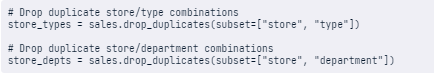

In [22]:
# Elimina combinaciones duplicadas de store/type
store_types = df_sales.drop_duplicates(subset=["store","type"])
print(store_types.head())

# Elimina combinaciones duplicadas de store/department
store_depts = df_sales.drop_duplicates(subset=["store","department"])
print(store_depts.head())

# Selecciona las filas donde is_holiday es True y elimina fechas duplicadas
holiday_dates = df_sales[df_sales['is_holiday'] == True].drop_duplicates(subset="date")

# Imprime la columna date de holiday_dates
print(holiday_dates['date'])

      Unnamed: 0  store type  department        date  weekly_sales  \
0              0      1    A           1  2010-02-05      24924.50   
901          901      2    A           1  2010-02-05      35034.06   
1798        1798      4    A           1  2010-02-05      38724.42   
2699        2699      6    A           1  2010-02-05      25619.00   
3593        3593     10    B           1  2010-02-05      40212.84   

      is_holiday  temperature_c  fuel_price_usd_per_l  unemployment  
0          False       5.727778              0.679451         8.106  
901        False       4.550000              0.679451         8.324  
1798       False       6.533333              0.686319         8.623  
2699       False       4.683333              0.679451         7.259  
3593       False      12.411111              0.782478         9.765  
    Unnamed: 0  store type  department        date  weekly_sales  is_holiday  \
0            0      1    A           1  2010-02-05      24924.50       False   

# Contar variables categoricas

In [24]:
# Cuenta el número de tiendas de cada type
store_counts = store_types['type'].value_counts()
print(store_counts)

# Obtén la proporción de tiendas de cada type
store_props = store_types['type'].value_counts(normalize=True)
print(store_props)

# Cuenta el número de cada department y ordena
dept_counts_sorted = store_depts['department'].value_counts(sort=True)
print(dept_counts_sorted)

# Obtén la proporción de cada department y ordena
dept_props_sorted = store_depts['department'].value_counts(sort=True, normalize=True)
print(dept_props_sorted)

type
A    11
B     1
Name: count, dtype: int64
type
A    0.916667
B    0.083333
Name: proportion, dtype: float64
department
1     12
2     12
3     12
4     12
5     12
      ..
37    10
48     8
50     6
39     4
43     2
Name: count, Length: 80, dtype: int64
department
1     0.012917
2     0.012917
3     0.012917
4     0.012917
5     0.012917
        ...   
37    0.010764
48    0.008611
50    0.006459
39    0.004306
43    0.002153
Name: proportion, Length: 80, dtype: float64


In [25]:
# calculo de ventas semanales
# Ventas semanales totales
sales_all = df_sales["weekly_sales"].sum()

# Selecciona las tiendas tipo A, calcula las ventas semanales totales
sales_A = df_sales[df_sales["type"] == "A"]["weekly_sales"].sum()

# Selecciona las tiendas tipo B, calcula las ventas semanales totales
sales_B = df_sales[df_sales["type"] == "B"]["weekly_sales"].sum()

# Selecciona las tiendas tipo C, calcula las ventas semanales totales
sales_C = df_sales[df_sales["type"] == "C"]["weekly_sales"].sum()

# Obtén la proporción de cada tipo
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_propn_by_type)

[0.9097747 0.0902253 0.       ]


# Agrupar

In [42]:
# Agrupa por type; calcula la suma de weekly_sales
sales_by_type = df_sales.groupby("type")["weekly_sales"].sum()
print(f'{sales_by_type} \n')

# Obtén la proporción de cada tipo
sales_propn_by_type = sales_by_type / sum(df_sales['weekly_sales'])
print(f'{sales_propn_by_type} \n')


# Agrupa por type y por is_holiday; calcula el total de weekly_sales
sales_by_type_is_holiday = df_sales.groupby(["type","is_holiday"])["weekly_sales"].sum()
print(f'{sales_by_type_is_holiday} \n')

type
A    2.337163e+08
B    2.317840e+07
Name: weekly_sales, dtype: float64 

type
A    0.909775
B    0.090225
Name: weekly_sales, dtype: float64 

type  is_holiday
A     False         2.336927e+08
      True          2.360181e+04
B     False         2.317678e+07
      True          1.621410e+03
Name: weekly_sales, dtype: float64 



In [52]:
# Para cada tipo de tienda, agrega weekly_sales: obtén min, max, media y mediana
sales_stats = df_sales.groupby('type')['weekly_sales'].agg(['min','max','mean','median'])

# Imprime sales_stats
print(f'sales_stats: \n {sales_stats} \n')

# Para cada tipo de tienda, agrega unemployment y fuel_price_usd_per_l: obtén mínimo, máximo, media y mediana
unemp_fuel_stats = df_sales.groupby('type')[['unemployment','fuel_price_usd_per_l']].agg(['min','max', 'mean', 'median'])

# Imprime unemp_fuel_stats
print(f'unemp_fuel_stats: \n {unemp_fuel_stats} \n')

sales_stats: 
          min        max          mean    median
type                                           
A    -1098.0  293966.05  23674.667242  11943.92
B     -798.0  232558.51  25696.678370  13336.08 

unemp_fuel_stats: 
      unemployment                         fuel_price_usd_per_l            \
              min    max      mean median                  min       max   
type                                                                       
A           3.879  8.992  7.972611  8.067             0.664129  1.107410   
B           7.170  9.765  9.279323  9.199             0.760023  1.107674   

                          
          mean    median  
type                      
A     0.744619  0.735455  
B     0.805858  0.803348   



# Tablas dinamicas

En pandas, las tablas dinámicas son esencialmente otra forma de realizar cálculos agrupados. Es decir, el método .pivot_table() es una alternativa a .groupby().

El método .pivot_table() tiene varios argumentos útiles, como fill_value y margins.

- Por defecto pivot_table calcula la media de la columna que le indicamos en values para cada grupo.

### Parametros
- `values` : este argumento es la columna que deseo resumir, es decir, sobre las que queremos calcular las estadisticas.
- `index` : este argumento es por el cual queremos agrupar.
- `aggfunc` : para el caso que querramos una estadistica diferente a la media. Si quiero calcular mas de una cosa, le paso un array de funciones. Las funciones las obtengo de numpy(al menos en la version de python de datacamp).
    - si queremos aplicar una funcion sobre mas de una columna, debemos pasarle un diccionario, donde la clave es la columna, y el valor es la funcion o lista de funciones a aplicar. Ejemplo:
    - `dogs.pivot_table(values = 'weight_kg', index = 'color', aggfunc = {'columna':funcion, 'weight_kg': [np.median,  np.mean]})`
- `columns` : si queremos agrupar por mas de una variable, usamos el parametro columns. Como resultado vamos a tener una tabla donde las filas son el parametro indicado en values, las columnas son la variable indicada en columns.
- `fill_values` : se puede dar el caso, que al crear la tabla dinamica, me queden NaN. Si quiero rellenar esos espacios con un valor por ej 0, utilizo este parametro.
- `margins` : este parametro nos va a dar estadisticas de todas las filas y columnas.

In [53]:
# Usa pivot_table para calcular la media de weekly_sales por tipo de tienda
mean_sales_by_type = df_sales.pivot_table(values="weekly_sales", index="type")

# Imprime mean_sales_by_type
print(mean_sales_by_type)

      weekly_sales
type              
A     23674.667242
B     25696.678370


In [55]:
# Usa pivot_table para calcular la medias y mediana de weekly_sales para cada tipo de tienda
mean_med_sales_by_type = df_sales.pivot_table(values='weekly_sales',index='type',aggfunc = ['mean','median'])

# Imprime mean_med_sales_by_type
print(mean_med_sales_by_type)

              mean       median
      weekly_sales weekly_sales
type                           
A     23674.667242     11943.92
B     25696.678370     13336.08


In [56]:
# Usa pivot_table para calcular la media de weekly_sales por type y por is_holiday 
mean_sales_by_type_holiday = df_sales.pivot_table(values='weekly_sales', index='type',columns='is_holiday')

# Imprime mean_sales_by_type_holiday
print(mean_sales_by_type_holiday)

is_holiday         False      True 
type                               
A           23768.583523  590.04525
B           25751.980533  810.70500


In [57]:
# Imprime la media de weekly_sales por department y type; rellena valores faltantes con 0
print(df_sales.pivot_table(values='weekly_sales',index='department',columns='type', fill_value =0))

type                    A              B
department                              
1            30961.725379   44050.626667
2            67600.158788  112958.526667
3            17160.002955   30580.655000
4            44285.399091   51219.654167
5            34821.011364   63236.875000
...                   ...            ...
95          123933.787121   77082.102500
96           21367.042857    9528.538333
97           28471.266970    5828.873333
98           12875.423182     217.428333
99             379.123659       0.000000

[80 rows x 2 columns]


In [58]:
# Imprime la media de weekly_sales por department y type; rellena los valores faltantes con 0s; suma todas las filas y columnas
print(df_sales.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0, margins=True))

type                   A              B           All
department                                           
1           30961.725379   44050.626667  32052.467153
2           67600.158788  112958.526667  71380.022778
3           17160.002955   30580.655000  18278.390625
4           44285.399091   51219.654167  44863.253681
5           34821.011364   63236.875000  37189.000000
...                  ...            ...           ...
96          21367.042857    9528.538333  20337.607681
97          28471.266970    5828.873333  26584.400833
98          12875.423182     217.428333  11820.590278
99            379.123659       0.000000    379.123659
All         23674.667242   25696.678370  23843.950149

[81 rows x 3 columns]
